#**🧠 Project Title + Overview**
SVR on Bike Rental Demand
We’ll build a regression model using Support Vector Regression (SVR) to predict the number of daily bike rentals based on weather conditions and time features. This helps understand the impact of temperature, humidity, and seasonality on bike usage**

##📦 Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

##📥 Step 2: Load Dataset

In [4]:
# Load daily bike sharing data from a public GitHub mirror
url = 'https://raw.githubusercontent.com/christophM/interpretable-ml-book/master/data/bike-sharing-daily.csv'
df = pd.read_csv(url)
df.head()


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


##🔍 Step 3: Explore Dataset

In [5]:
print(df.shape)
print(df.info())
print(df.describe())

(731, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
          instant      season          yr        mnth     holiday     weekday 

##📊 Step 4: Exploratory Data Analysis (EDA)

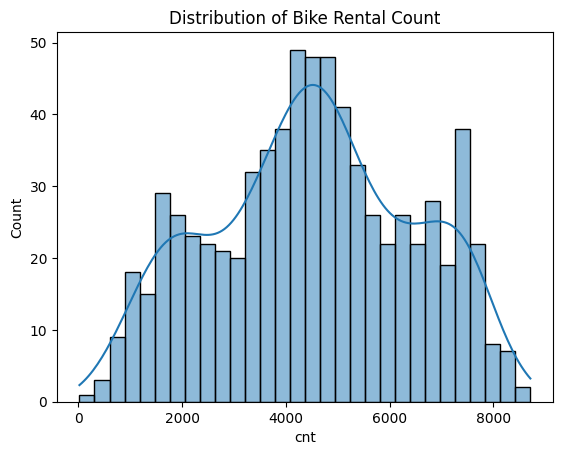

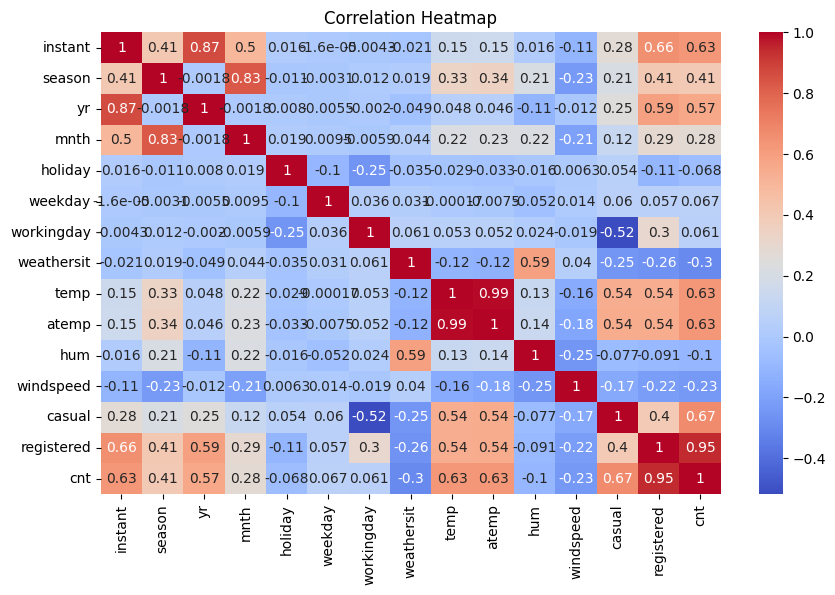

In [7]:
# Distribution of target variable
sns.histplot(df['cnt'], bins=30, kde=True)
plt.title("Distribution of Bike Rental Count")
plt.show()

# Use only numeric columns for correlation
numeric_df = df.select_dtypes(include=np.number)

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



##🧼 Step 5: Preprocessing

In [8]:
# Drop unnecessary columns
df = df.drop(columns=['instant', 'dteday', 'casual', 'registered'])

# One-hot encode 'season' and 'weathersit'
df = pd.get_dummies(df, columns=['season', 'weathersit'], drop_first=True)

# Features and target
X = df.drop(columns=['cnt'])
y = df['cnt']

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


##🧪 Step 6: Train-Test Split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

##🧠 Step 7: Train the Model

In [10]:
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

y_pred_svr = svr.predict(X_test)

##✅ Step 8: Evaluate the Model

In [11]:
mae = mean_absolute_error(y_test, y_pred_svr)
mse = mean_squared_error(y_test, y_pred_svr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_svr)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.4f}")

MAE: 780.48
MSE: 1045775.48
RMSE: 1022.63
R2 Score: 0.7392


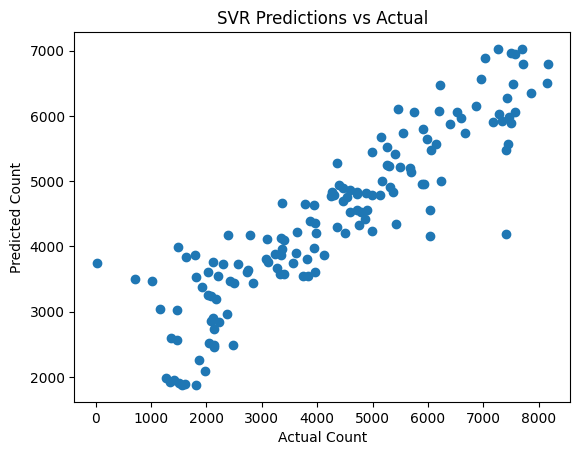

In [12]:
# Actual vs Predicted scatter plot
plt.scatter(y_test, y_pred_svr)
plt.xlabel("Actual Count")
plt.ylabel("Predicted Count")
plt.title("SVR Predictions vs Actual")
plt.show()

##💬 Final Summary
- SVR was trained using RBF kernel to predict daily bike rental counts.
- Performance is reasonable given the non-linearity in data.
- SVR is sensitive to feature scaling, so `StandardScaler` was essential.
- Improvements could include trying polynomial kernel or tuning `C`, `gamma`, `epsilon` via GridSearch.
